In [104]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("aac_intakes_outcomes.csv")

In [105]:
totalRecords = len(data)
print("Total Records: " + "{:,}".format(totalRecords))

Total Records: 79,672


## Total Animals by Type

In [106]:
total_by_animalType = data.groupby("animal_type").count()["animal_id_intake"]
total_by_animalType = total_by_animalType.reset_index()
total_by_animalType = total_by_animalType.rename(columns =  {"animal_type":"Animal Type", "animal_id_intake":"Totals"})
total_by_animalType

,Animal Type,Totals
0,Bird,339
1,Cat,29539
2,Dog,45366
3,Other,4428


## Breeds by Animals Type

In [107]:
animaltype_breed = []
for animaltype in data["animal_type"].unique():
    animaltype_dataset = data.loc[data["animal_type"] == animaltype]
    animaltype_breed.append([animaltype, len(animaltype_dataset["breed"].unique())])
pd.DataFrame(animaltype_breed, columns=["Animal Type", "Total Breeds"])

,Animal Type,Total Breeds
0,Dog,1919
1,Cat,82
2,Other,97
3,Bird,58


## Clean Data

In [108]:
data.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


In [109]:
data["age_upon_intake_number"] = [number.split(" ")[0] for number in data["age_upon_intake"]]
data["age_upon_intake_lentime"] = [number.split(" ")[1] for number in data["age_upon_intake"]]
#data.head()
#Clean found_location_street 
data["found_location_street"] = [location.replace(" in Austin (TX)", "") for location in data["found_location"]]
data["found_location_street"] = [location.replace(" Austin (TX)", "") for location in data["found_location_street"]]
data["found_location_street"] = [location.replace("Austin (TX)", "") for location in data["found_location_street"]]
data["found_location_street"] = [location.replace(" (TX)", "") for location in data["found_location_street"]]
data["found_location_street"] = [location.replace("(TX)", "") for location in data["found_location_street"]]
#[location.replace(" in Austin (TX)", "") for location in data["found_location"]]
data.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,age_upon_intake_number,age_upon_intake_lentime,found_location_street
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194,10,years,Colony Creek And Hunters Trace
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722,7,years,8700 Research Blvd
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889,6,years,8700 Research
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139,10,years,
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444,16,years,12034 Research Blvd


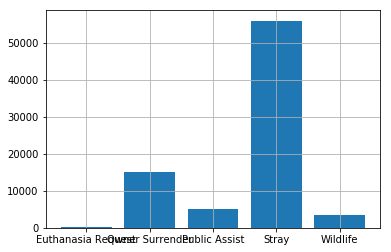

In [110]:
data_intake_type = data.groupby("intake_type").count()
data_intake_type
plt.bar(data_intake_type.index, data_intake_type["age_upon_outcome"], align="center")
plt.grid()

In [111]:
data.groupby("outcome_type").count()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,...,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,age_upon_intake_number,age_upon_intake_lentime,found_location_street
outcome_type,,,,,,,,,,,,,,,,,,,,,
Adoption,33594,33594,33594,5841,33594,33594,33594,33594,33594,33594,...,33594,33594,33594,33594,33594,33594,33594,33594,33594,33594
Died,690,690,690,602,690,690,690,690,690,690,...,690,690,690,690,690,690,690,690,690,690
Disposal,304,304,304,0,304,304,304,304,304,304,...,304,304,304,304,304,304,304,304,304,304
Euthanasia,6244,6244,6244,6070,6244,6244,6244,6244,6244,6244,...,6244,6244,6244,6244,6244,6244,6244,6244,6244,6244
Missing,46,46,46,35,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
Relocate,15,15,15,0,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
Return to Owner,14791,14791,14791,1,14790,14791,14791,14791,14791,14791,...,14791,14791,14791,14791,14791,14791,14791,14791,14791,14791
Rto-Adopt,179,179,179,0,179,179,179,179,179,179,...,179,179,179,179,179,179,179,179,179,179
Transfer,23799,23799,23799,23799,23799,23799,23799,23799,23799,23799,...,23799,23799,23799,23799,23799,23799,23799,23799,23799,23799


In [112]:
data_intake_outcome = data.groupby(["intake_type", "outcome_type"]).count()

In [113]:
data_intake_outcome["age_upon_outcome"]

intake_type         outcome_type   
Euthanasia Request  Adoption              14
                    Died                   3
                    Euthanasia           196
                    Return to Owner        5
                    Transfer              33
Owner Surrender     Adoption            8958
                    Died                  92
                    Disposal               2
                    Euthanasia           602
                    Missing                8
                    Return to Owner      798
                    Rto-Adopt             47
                    Transfer            4521
Public Assist       Adoption             625
                    Died                  26
                    Disposal              28
                    Euthanasia           240
                    Missing                1
                    Return to Owner     3330
                    Rto-Adopt             12
                    Transfer             730
Stray              

In [118]:
dogs = data.loc[data["animal_type"] == "Dog"]
dogs.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,age_upon_intake_number,age_upon_intake_lentime,found_location_street
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194,10,years,Colony Creek And Hunters Trace
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722,7,years,8700 Research Blvd
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889,6,years,8700 Research
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139,10,years,
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444,16,years,12034 Research Blvd
